*Benjamin Bradley*

**Date: May 15th, 2024**

Summary:

- Put Yuizhong's Gravitational Environment in terms of Natural Units
- Observed stable orbits at tangential velocity of $2π$ with $T=1$
- Added printing of state variables in terms of Gravitational acceleration and Thrust acceleration at any given step.
- Adjusted legend to not repeat itself.
- Added a plot of total energy, kinetic energy, and potential energy.


## Initializations

In [ ]:
!git clone https://github.com/BrownParticleAstro/YH_Rocket_Circularization.git

# Step 2: Change the working directory
import os
os.chdir('YH_Rocket_Circularization')

# Step 3: List available branches
!git branch -a

# Step 4: Switch to the desired branch
!git checkout ben

# Step 5: List files in the current directory to verify
!ls

Cloning into 'YH_Rocket_Circularization'...
remote: Enumerating objects: 961, done.
remote: Counting objects: 100% (267/267), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 961 (delta 169), reused 228 (delta 135), pack-reused 694
Receiving objects: 100% (961/961), 81.90 MiB | 7.42 MiB/s, done.
Resolving deltas: 100% (563/563), done.
Updating files: 100% (52/52), done.
* master
  remotes/origin/HEAD -> origin/master
  remotes/origin/ben
  remotes/origin/master
  remotes/origin/sophia_b
Branch 'ben' set up to track remote branch 'ben' from 'origin'.
Switched to a new branch 'ben'
A2C.py				       ppo_rocketCircularization_tensorboard
a2c_rocketCircularization_tensorboard  ppo_rocket_circularization.zip
a2c_rocket_circularization.zip	       radial_2
animation.py			       radial_5
bounded_3			       radial_6
bounds.py			       radial_rocket.ipynb
DQN.py				       radial_rocket.py
dqn_test_10			       README.md
dqn_test_11			       rocket_a2c.py
dqn_test_12			       

In [ ]:
!pip install stable_baselines3
!pip install shimmy

import gym
import numpy as np
import matplotlib.pyplot as plt
from typing import Any, List, Sequence, Tuple
import torch as th
import stable_baselines3
from stable_baselines3 import PPO, A2C, DQN, SAC
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.noise import NormalActionNoise
import tensorflow as tf
import rocket_gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-many

ModuleNotFoundError: No module named 'gymnasium.wrappers.monitoring'

In [ ]:
from IPython.display import HTML
from base64 import b64encode
def show_video(video_path, video_width = 600):
  video_file = open(video_path, "r+b").read()
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

## Verifying Dynamics

- $G = (2π)^2$ $Nm^2/g^2$
- $M = 1$  $g$
- $m = .01$ $g$
- $dt_1 = .01$ $s$
- $dt_2 = 0.001$ $s$
- $v_0^y = 2\pi$ $m/s$
- $T=1$ $s$
- $r_0=1$ $m$

In [ ]:
import rocket_gym
import numpy as np

init_func = rocket_gym.varied_l(r_min=0.5, r_max=1.5)
env = rocket_gym.RocketEnv(max_step=400, simulation_step=1, rmax=1.5, rmin=0.5, vmax=1000, max_thrust=100,
                          oob_penalty=0, dt=0.01, wall_mechanics=False, clip_thrust='None',
                          velocity_penalty_rate=0.0, thrust_penalty_rate=0.001,
                          init_r=1, init_theta=0, init_rdot=0, init_thetadot=0)
state = env.reset()

done = False
i = 1
while not done:
    env.render()

    if i<3:
      action = [0, np.pi] # [x,y] components of thrust
      state, reward, done, truncated, info = env.step(action, True)
    else:
      action = [0,0]
      state, reward, done, truncated, info = env.step(action, False)

    done = done or truncated
    i += 1

print(i)
env.show(path='test.mp4', step=1)
show_video('test.mp4')


/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/content/YH_Rocket_Circularization/rocket_gym.py:569: RuntimeWarning: divide by zero encountered in scalar divide
  reward = 1 + 1/(10*np.linalg.norm(action))


gravitational_acc=[-39.4784176  -0.       ]
thrust_acc=[  0.         314.15926536]
total_acc=[-39.4784176  314.15926536]
dv=[-0.39478418  3.14159265]
dr=[-0.00394784  0.03141593]
new state=[ 0.99605216  0.03141593 -0.39478418  3.14159265]
 
gravitational_acc=[-39.73267851  -1.25318629]
thrust_acc=[  0.         314.15926536]
total_acc=[-39.73267851 312.90607907]
dv=[-0.39732679  3.12906079]
dr=[-0.00792111  0.06270653]
new state=[ 0.98813105  0.09412246 -0.79211096  6.27065344]
 
401


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (4,).

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (4,).

<Figure size 1200x800 with 4 Axes>

/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/content/YH_Rocket_Circularization/rocket_gym.py:569: RuntimeWarning: divide by zero encountered in scalar divide
  reward = 1 + 1/(10*np.linalg.norm(action))


gravitational_acc=[-39.4784176  -0.       ]
thrust_acc=[   0.         6283.18530718]
total_acc=[ -39.4784176  6283.18530718]
dv=[-0.03947842  6.28318531]
dr=[-3.94784176e-05  6.28318531e-03]
new state=[ 0.99996052  0.00628319 -0.03947842  6.28318531]
 
1101


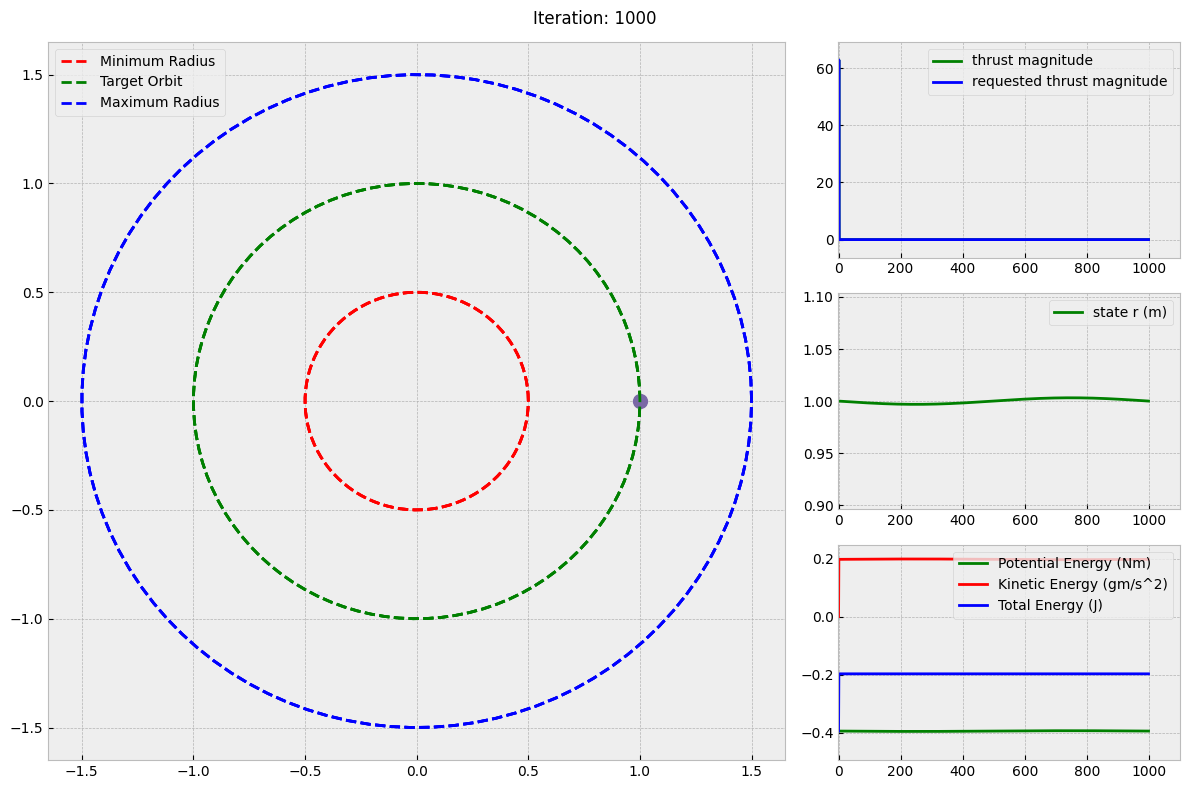

In [ ]:
dt_factor = 0.1 # LOWER DT, 10x STEPS
init_func = rocket_gym.varied_l(r_min=0.5, r_max=1.5)
env = rocket_gym.RocketEnv(max_step=1100, simulation_step=1, rmax=1.5, rmin=0.5, vmax=1000, max_thrust=100,
                          oob_penalty=0, dt=0.01*dt_factor, wall_mechanics=False, clip_thrust='None',
                          velocity_penalty_rate=0.0, thrust_penalty_rate=0.001,
                          init_r=1, init_theta=0, init_rdot=0, init_thetadot=0)
state = env.reset()

done = False
i = 1
while not done:
    env.render()

    if i==1:
      action = [0, (1/dt_factor)*2*np.pi] # [x,y] components of thrust
      state, reward, done, truncated, info = env.step(action, True)
    else:
      action = [0,0]
      state, reward, done, truncated, info = env.step(action, False)

    i += 1
    done = done or truncated

print(i)
env.show(path='test.mp4', step=100)
show_video('test.mp4')

## Testing out Wrappers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


401


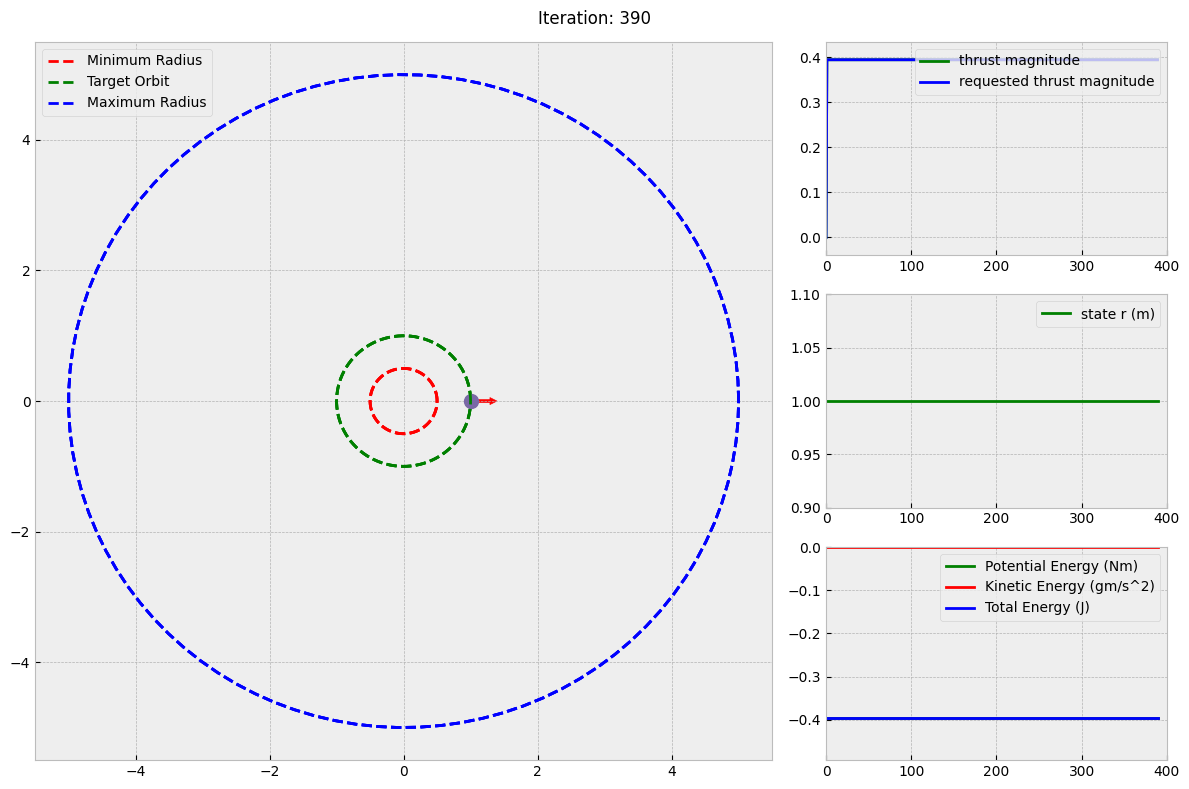

In [ ]:
init_func = rocket_gym.varied_l(r_min=0.5, r_max=1.5)
env = rocket_gym.PolarizeAction(rocket_gym.RocketEnv(max_step=400, simulation_step=1, rmax=5, rmin=0.5, vmax=1000, max_thrust=100,
                                                    oob_penalty=0, dt=0.01, wall_mechanics=False, clip_thrust='None',
                                                    velocity_penalty_rate=0.0, thrust_penalty_rate=0.001,
                                                    init_r=1, init_theta=0, init_rdot=0, init_thetadot=0))
state = env.reset()

done = False
i = 1
while not done:
    env.render()

    # if i==1:
    #   action = [0, 2*np.pi] # [radial, tangential] components of thrust
    #   state, reward, done, truncated, info = env.step(action)
    # else:
    #   action = [0,0]
    #   state, reward, done, truncated, info = env.step(action)

    action = [0.01*((2*np.pi)**2),0]
    state, reward, done, truncated, info = env.step(action)

    done = done or truncated
    i += 1

print(i)
env.show(path='test.mp4')
show_video('test.mp4')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


401


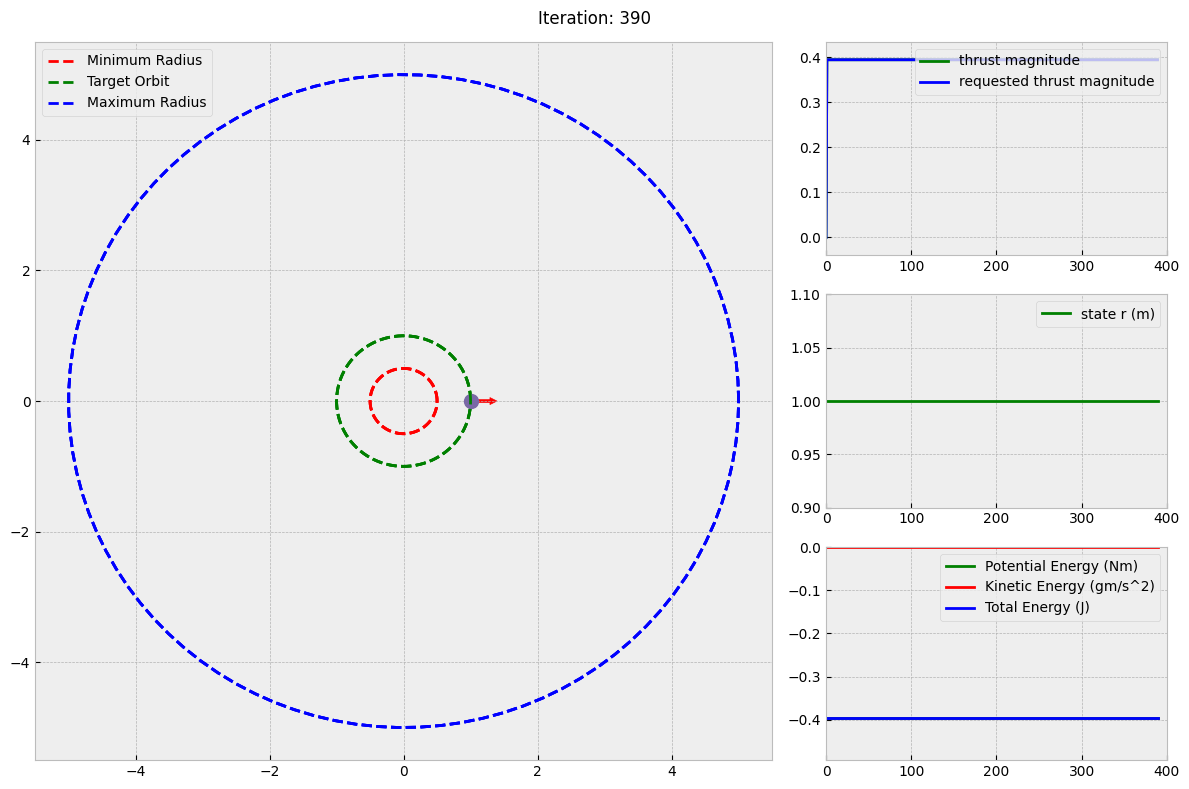

In [ ]:
import rocket_gym
import numpy as np

init_func = rocket_gym.varied_l(r_min=0.5, r_max=1.5)
env = rocket_gym.PolarizeObservation(
      rocket_gym.PolarizeAction(
      rocket_gym.RocketEnv(max_step=400, simulation_step=1, rmax=5, rmin=0.5, vmax=1000, max_thrust=100,
                           oob_penalty=0, dt=0.01, wall_mechanics=False, clip_thrust='None',
                           velocity_penalty_rate=0.0, thrust_penalty_rate=0.001,
                           init_r=1, init_theta=0, init_rdot=0, init_thetadot=0)))

state = env.reset()
done = False
i = 1
while not done:
    env.render()

    # if i==1:
    #   action = [0, 2*np.pi] # [radial, tangential] components of thrust
    #   state, reward, done, truncated, info = env.step(action)
    # else:
    #   action = [0,0]
    #   state, reward, done, truncated, info = env.step(action)

    action = [0.01*((2*np.pi)**2),0] # [radial, tangential] components of thrust
    state, reward, done, truncated, info = env.step(action)

    done = done or truncated
    i += 1

print(i)
env.show(path='test.mp4')
show_video('test.mp4')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


401


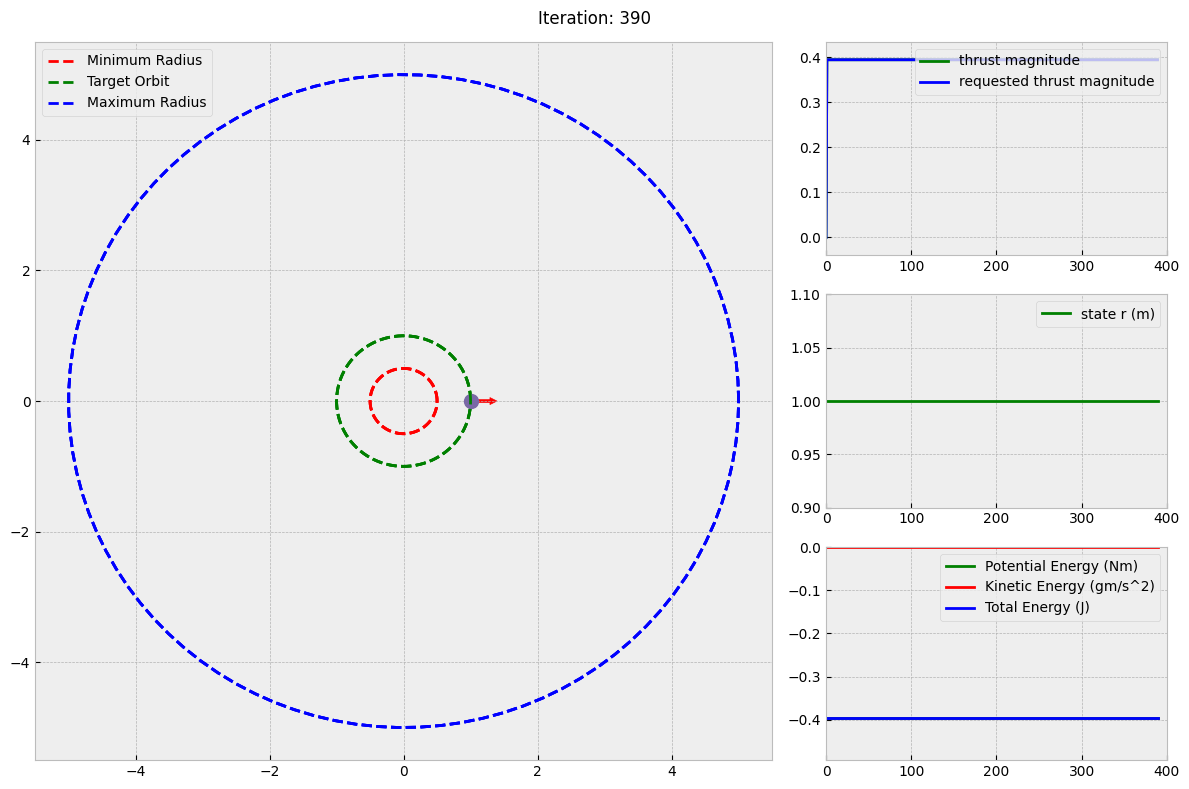

In [ ]:
import rocket_gym
import numpy as np

init_func = rocket_gym.varied_l(r_min=0.5, r_max=1.5)
env = rocket_gym.PolarizeObservation(
      rocket_gym.PolarizeAction(
      rocket_gym.RocketEnv(max_step=400, simulation_step=1, rmax=5, rmin=0.5, vmax=1000, max_thrust=100,
                           oob_penalty=0, dt=0.01, wall_mechanics=False, clip_thrust='None',
                           velocity_penalty_rate=0.0, thrust_penalty_rate=0.001,
                           init_r=1, init_theta=0, init_rdot=0, init_thetadot=0)))

state = env.reset()
done = False
i = 1
while not done:
    env.render()

    # if i==1:
    #   action = [0, 2*np.pi] # [radial, tangential] components of thrust
    #   state, reward, done, truncated, info = env.step(action)
    # else:
    #   action = [0,0]
    #   state, reward, done, truncated, info = env.step(action)

    action = [0.01*((2*np.pi)**2),0] # [radial, tangential] components of thrust
    state, reward, done, truncated, info = env.step(action)

    done = done or truncated
    i += 1

print(i)
env.show(path='test.mp4')
show_video('test.mp4')


## Models?

In [ ]:
init_func = rocket_gym.varied_l(r_min=0.5, r_max=1.5)
env = rocket_gym.RocketEnv(max_step=10_000, simulation_step=1, rmax=1.5, rmin=0.5, vmax=1000, max_thrust=100,
                          oob_penalty=0, dt=0.01, wall_mechanics=False, clip_thrust='None',
                          velocity_penalty_rate=0.0, thrust_penalty_rate=0.001,
                          init_r=1, init_theta=0, init_rdot=0, init_thetadot=0)
env = make_vec_env(lambda: env, n_envs=4)


# Initialize PPO model
policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=dict(pi=[48, 48, 48, 48, 48, 48], vf=[48, 48, 48, 48, 48, 48]))
model = PPO("MlpPolicy", env, batch_size=128, gamma=0.995, policy_kwargs=policy_kwargs, tensorboard_log="./ppo_rocketCircularization_tensorboard/", verbose=1)

# Check if the model starts learning without error
try:
    model.learn(total_timesteps=1_500_000, progress_bar=True)
    print("Model training started successfully!")
except Exception as e:
    print("Error during training:", e)

model.save("ppo_yizhong")



# ========== #
init_func = rocket_gym.varied_l(r_min=0.5, r_max=1.5)
env = rocket_gym.RocketEnv(max_step=10_000, simulation_step=1, rmax=2, rmin=0.5, vmax=1000, max_thrust=100,
                          oob_penalty=0, dt=0.01, wall_mechanics=False, clip_thrust='None',
                          velocity_penalty_rate=0.0, thrust_penalty_rate=0.001,
                          init_r=1, init_theta=0, init_rdot=0, init_thetadot=0)
state = env.reset()
model = PPO.load("ppo_yizhong")
done = False
i = 1
while not done:
    env.render()

    if len(state)==2: state = state[0]

    action, _states = model.predict(state)
    state, reward, done, truncated, info = env.step(action)
    done = done or truncated

    i += 1

print(i)
env.show(path='test.mp4', step=25)
show_video('test.mp4')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


NameError: name 'make_vec_env' is not defined

In [ ]:
init_func = rocket_gym.varied_l(r_min=0.5, r_max=1.5)
env = rocket_gym.RocketEnv(max_step=10_000, simulation_step=1, rmax=2, rmin=0.5, vmax=1000, max_thrust=100,
                          oob_penalty=0, dt=0.01, wall_mechanics=False, clip_thrust='None',
                          velocity_penalty_rate=0.0, thrust_penalty_rate=0.001,
                          init_r=1, init_theta=0, init_rdot=0, init_thetadot=0)
state = env.reset()
model = PPO.load("ppo_yizhong")

done = False
i = 1
while not done:
    env.render()

    if len(state)==2: state = state[0]

    action, _states = model.predict(state)
    state, reward, done, truncated, info = env.step(action, False)
    done = done or truncated

    i += 1

print(i)
env.show(path='test.mp4', step=25)
show_video('test.mp4')